In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

# Your Deep Learning Journey

## Your First Model

In [3]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.156292,0.039566,0.010825,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.066665,0.026577,0.009472,00:42


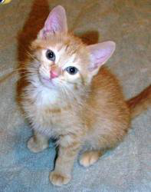

In [4]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [5]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [8]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [9]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


### What Is Machine Learning?

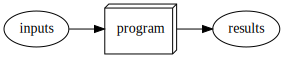

In [10]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

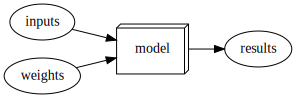

In [11]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

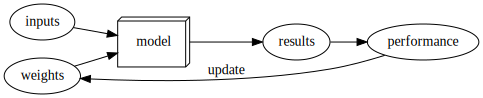

In [12]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

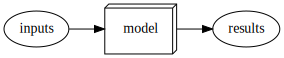

In [13]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

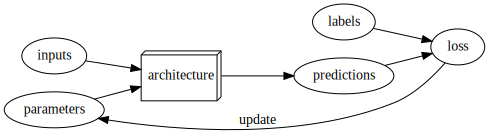

In [14]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

## Deep Learning Is Not Just for Image Classification

In [15]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.688910,1.914583,00:04


epoch,train_loss,valid_loss,time
0,1.608113,1.438766,00:02
1,1.417178,1.229790,00:03
2,1.345733,1.319942,00:02
3,1.337104,1.127688,00:03
4,1.248275,0.953960,00:03
5,1.149996,0.904508,00:03
6,1.062437,0.865566,00:02
7,0.991121,0.855062,00:03


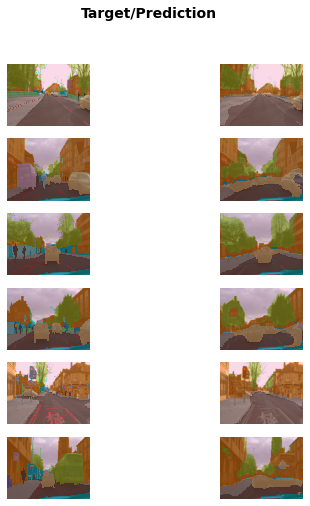

In [16]:
learn.show_results(max_n=6, figsize=(7,8))

In [17]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.471634,0.397302,0.821560,04:22


epoch,train_loss,valid_loss,accuracy,time
0,0.304326,0.249211,0.896400,05:40
1,0.251233,0.223417,0.912520,05:42
2,0.191696,0.200457,0.925200,05:41
3,0.143642,0.194688,0.928760,05:42


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [18]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([3.1334e-04, 9.9969e-01]))

In [19]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [20]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371908,0.371355,0.833845,00:13
1,0.361892,0.365945,0.831695,00:12
2,0.353477,0.357533,0.834152,00:13


In [21]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.514027,1.414746,00:02


epoch,train_loss,valid_loss,time
0,1.352839,1.353742,00:02
1,1.238354,1.166672,00:01
2,1.017358,0.865734,00:01
3,0.797716,0.733449,00:02
4,0.685541,0.704870,00:01
5,0.644042,0.696058,00:01
6,0.625612,0.694088,00:01
7,0.615094,0.691392,00:02
8,0.613931,0.691198,00:02
9,0.609334,0.691074,00:01


In [22]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,97.0,3.0,4.052108
1,74.0,55.0,5.0,4.454032
2,85.0,40.0,3.0,3.510991
3,18.0,85.0,4.0,3.479806
4,26.0,45.0,4.0,4.505086
5,9.0,80.0,4.0,3.491925
6,100.0,12.0,1.0,3.067401
7,41.0,84.0,3.0,3.963876
8,98.0,23.0,4.5,3.070635


## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. Do you need these for deep learning?

   - Lots of math T / F
   - Lots of data T / F
   - Lots of expensive computers T / F
   - A PhD T / F
   
   False to all of the above.
   
1. Name five areas where deep learning is now the best in the world.

    - NLP
    - Computer vision
    - Medicine
    - Biology
    - Recommendation systems 
    
1. What was the name of the first device that was based on the principle of the artificial neuron?

    The Mark I Perceptron.
    
1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?

    - A set of processing units
    - A state of activation
    - An output function for each unit
    - A pattern of connectivity among units
    - A propagation rule for propagating patterns of activities through the network of connectivities
    - An activation rule for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit
    - A learning rule whereby patterns of connectivity are modified by experience
    - An environment within which the system must operate
    
1. What were the two theoretical misunderstandings that held back the field of neural networks?

    - A single layer was unable to learn some simple but critical mathematical functions (such as XOR), ignoring that using multiple layers would address those limitations
    - In theory, adding just one extra layer of neurons was enough to allow any mathematical function to be approximated with these neural networks, but in practice such networks were often too big and too slow to be useful.
    
1. What is a GPU?

    Graphics Processing Unit (GPU): Also known as a graphics card. A special kind of processor in your computer that can handle thousands of single tasks at the same time, especially designed for displaying 3D environments on a computer for playing games. These same basic tasks are very similar to what neural networks do, such that GPUs can run neural networks hundreds of times faster than regular CPUs. All modern computers contain a GPU, but few contain the right kind of GPU necessary for deep learning.
    
1. Open a notebook and execute a cell containing: `1+1`. What happens?

    = 2
    
1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.

1. Complete the Jupyter Notebook online appendix.

1. Why is it hard to use a traditional computer program to recognize images in a photo?

    Programming a computer for such computations is, at best, a difficult task, not primarily because of any inherent complexity in the computer itself but, rather, because of the need to spell out every minute step of the process in the most exasperating detail. Computers, as any programmer will tell you, are giant morons, not giant brains.
    
1. What did Samuel mean by "weight assignment"?

    Weights are just variables, and a weight assignment is a particular choice of values for those variables. The program's inputs are values that it processes in order to produce its results—for instance, taking image pixels as inputs, and returning the classification "dog" as a result. The program's weight assignments are other values that define how the program will operate.

1. What term do we normally use in deep learning for what Samuel called "weights"?

    Parameters. 
    
1. Draw a picture that summarizes Samuel's view of a machine learning model.

1. Why is it hard to understand why a deep learning model makes a particular prediction?

    Because certain tasks are so complex when one thinks about it that it's not obvious how you'd program a computer to do it. 
    
    There might be a range of checkers strategies encoded, and some kind of search mechanism, and then the weights could vary how strategies are selected, what parts of the board are focused on during a search, and so forth. But it's not at all obvious what the model might look like for an image recognition program, or for understanding text, or for many other interesting problems we might imagine.
    
1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
    
    Universal approximation theorem

1. What do you need in order to train a model?

    Data.

1. How could a feedback loop impact the rollout of a predictive policing model?

    A predictive policing model is created based on where arrests have been made in the past. In practice, this is not actually predicting crime, but rather predicting arrests, and is therefore partially simply reflecting biases in existing policing processes.
    
1. Do we always have to use 224×224-pixel images with the cat recognition model?

    No.
    
1. What is the difference between classification and regression?

    A classification model is one which attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat." A regression model is one which attempts to predict one or more numeric quantities, such as a temperature or a location. 
    
1. What is a validation set? What is a test set? Why do we need them?

    The validation set is set of data held out from training, used only for measuring how good the model is.This lets us test that the model learns lessons from the training data that generalize to new data, the validation data. Our models however can be indirectly affected by this because when we tune the hyperparameters, our choices are indirectly made on account of the validation data.
    
    The test set is set of examples used only used to assess the performance at the very end of our efforts and cannot be used to improve our model.
    
1. What will fastai do if you don't provide a validation set?

    It will default to setting aside 20% of your data for validation.
    
1. Can we always use a random sample for a validation set? Why or why not?

    No, because in certain instances it won't be representative of the new data you will see in the future.
    
    Ex. Time series data
    
1. What is overfitting? Provide an example.

    Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training
    
    An example of this would be the following:
    
    In the Kaggle distracted driver competition, the independent variables are pictures of drivers at the wheel of a car, and the dependent variables are categories such as texting, eating, or safely looking ahead. Lots of pictures are of the same drivers in different positions. If you were an insurance company building a model from this data, note that you would be most interested in how the model performs on drivers it hasn't seen before (since you would likely have training data only for a small group of people). In recognition of this, the test data for the competition consists of images of people that don't appear in the training set.
    
    If you put one of the images in in your training set and one in the validation set, your model will have an easy time making a prediction for the one in the validation set, so it will seem to be performing better than it would on new people. Another perspective is that if you used all the people in training your model, your model might be overfitting to particularities of those specific people, and not just learning the states (texting, eating, etc.).

1. What is a metric? How does it differ from "loss"?

    A metric is a function that measures the quality of the model's predictions using the validation set
    
    The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. In other words, a good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand, and that hews as closely as possible to what you want the model to do. At times, you might decide that the loss function is a suitable metric, but that is not necessarily the case.
    
1. How can pretrained models help?

    It ensures that are models are capable before even showing them any data.
    
1. What is the "head" of a model?

    The head of a model is the part that is newly added to be specific to the new dataset. 

1. What kinds of features do the early layers of a CNN find? How about the later layers?

    Early: diagonal, horizontal, vertical edges, different gradients, corners, repeating lines, circles, and other simple patterns
    
    Later: higher-level semantic components (ex. car wheels, text, and flower petals) and other higher-level concepts.
    
1. Are image models only useful for photos?

    No.
    
1. What is an "architecture"?

    The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to
    
1. What is segmentation?

    Creating a model that can recognize the content of every individual pixel in an image.
    
1. What is `y_range` used for? When do we need it?

    To identify the range of acceptible value for our target. It's used when predicting a continuous number.
    
1. What are "hyperparameters"?

    A parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

1. What's the best way to avoid failures when using AI in an organization?

    Understanding what `test` and `validation` sets are and why they're important. by holding out test data, and then checking a model against a metric of your choosing, based on what actually matters to you in practice, will give you a better idea of whether the performance level of a model is adequate.